# Depth-Anything-V2-Mini Baseline

## Setting up the data loader

In [29]:
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
import utils as u

In [30]:
from Dataset import NYUDepthV2Dataset

In [31]:
from torch.utils.data import DataLoader
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = NYUDepthV2Dataset('nyu_depth_v2_labeled.mat', transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [32]:
for images, depths in dataloader:
    print("Images shape:", images.shape)
    print("Depths shape:", depths.shape)
    break

Images shape: torch.Size([16, 3, 640, 480])
Depths shape: torch.Size([16, 1, 640, 480])


## Viewing the NYU v2 Dataset
- Importing Dataset from Hugging Face: [Hugging Face: NYU Depth V2](https://huggingface.co/datasets/sayakpaul/nyu_depth_v2)
- Downloading Dataset: [NYU Depth V2](https://cs.nyu.edu/~fergus/datasets/nyu_depth_v2.html)

In [33]:
images = np.array(dataset.file['images'])
depths = np.array(dataset.file['depths'])

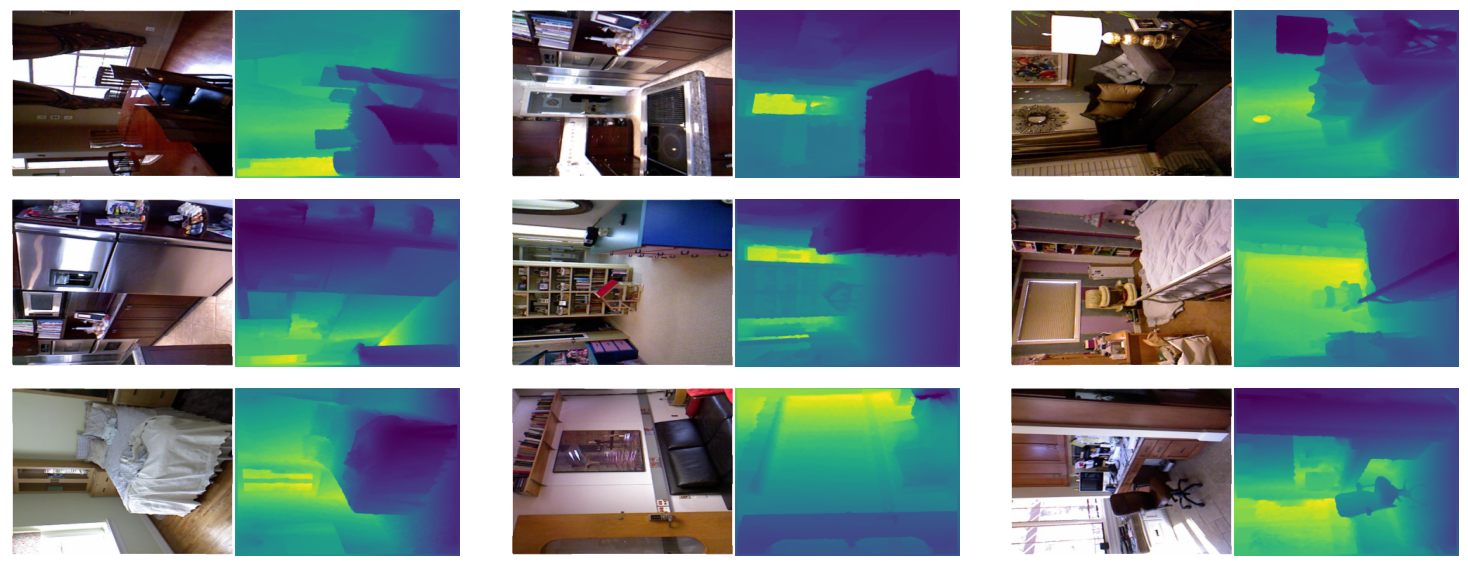

In [34]:
random_indices = np.random.choice(len(images), 9).tolist()

plt.figure(figsize=(15, 6))

for i, idx in enumerate(random_indices):
    ax = plt.subplot(3, 3, i + 1)
    image_viz = u.merge_into_row(images[idx], depths[idx])
    plt.tight_layout()
    plt.imshow(image_viz.astype("uint8"))
    plt.axis("off")

## Using the Model 
- Importing Depth-Anything-V2 Small from Transformer: [Hugging Face: Depth Anything V2](https://huggingface.co/docs/transformers/main/en/model_doc/depth_anything_v2)

In [35]:
import Baseline as b
import torch
import tqdm

In [36]:
model, criterion, optimizer = b.create_baseline()

## Baseline Training

In [37]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 10

In [38]:
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    
    for images, depths in dataloader:
        images, depths = images.to(device), depths.to(device)
                
        outputs = model(images)
        print(outputs, depths)
        break
#         loss = criterion(outputs, depths)
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         total_loss += loss.item()
    
#     avg_loss = total_loss / len(dataloader)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Average Loss: {avg_loss:.4f}')

# print("Training completed!")

tensor([[[6.2410, 6.3108, 6.3300,  ..., 4.7620, 4.8237, 3.9126],
         [6.3991, 6.2322, 6.2087,  ..., 4.7816, 4.6756, 4.4834],
         [6.3757, 6.2446, 6.2612,  ..., 4.8142, 4.7770, 4.7186],
         ...,
         [7.0565, 6.9117, 7.0766,  ..., 3.8146, 3.8299, 3.8677],
         [6.8869, 6.7290, 6.8910,  ..., 3.8238, 3.8416, 3.8707],
         [6.1410, 6.1715, 6.2381,  ..., 3.7737, 3.8199, 3.8664]],

        [[4.2553, 4.3846, 4.0604,  ..., 2.4439, 2.4935, 2.0502],
         [4.8250, 4.4212, 4.1024,  ..., 2.4626, 2.4345, 2.3290],
         [4.9517, 4.5447, 4.3505,  ..., 2.4693, 2.4592, 2.4294],
         ...,
         [8.0056, 7.9268, 8.0169,  ..., 3.8897, 3.8939, 3.9431],
         [7.8985, 7.7255, 7.8662,  ..., 3.9207, 3.9613, 3.9693],
         [7.3237, 7.4136, 7.2707,  ..., 3.8895, 3.9789, 3.9786]],

        [[6.4753, 6.6138, 6.6372,  ..., 2.9498, 3.0099, 2.4879],
         [6.7345, 6.5213, 6.4921,  ..., 2.9870, 2.9312, 2.8379],
         [6.7414, 6.5017, 6.5818,  ..., 3.0032, 3.0058, 2.

: 